In [1]:
import os
import sys
home_dir = "../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
# from models.helpers import data_format

In [6]:
datatype = "selex"
ml_outputs_dir = f"/usr/projects/pyDNA_EPBD/pyDNA_EPBD_inputs_outputs/outputs_mls/"

In [7]:
rbf_svr_df = pd.read_csv(f"{ml_outputs_dir}aggregated_performance_{datatype}_rbf_svr.tsv", sep="\t")
onehot_r2 = rbf_svr_df["Onehot R2(avg/std)"].apply(lambda x: float(x.split("/")[0])).to_numpy()
onehotbds_r2 = rbf_svr_df["Onehot+BDs R2(avg/std)"].apply(lambda x: float(x.split("/")[0])).to_numpy()
families = rbf_svr_df["Data"].apply(lambda x: x.split("_")[0]).to_numpy()
print(onehot_r2.shape, onehotbds_r2.shape, families.shape)
print(len(set(families)))

(215,) (215,) (215,)
27


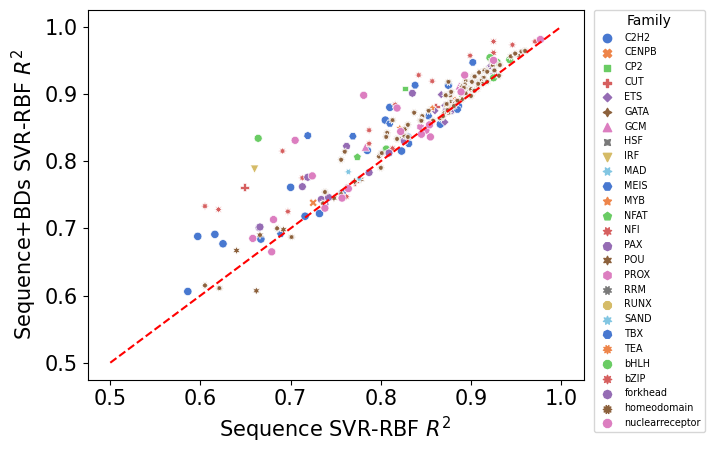

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=onehot_r2, y=onehotbds_r2, hue=families, style=families, palette="muted")
plt.plot([.5,1], [.5, 1], color="r", linestyle='--')
plt.ylabel("Sequence+BDs SVR-RBF $R^2$", fontsize=15)
plt.xlabel("Sequence SVR-RBF $R^2$", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize="x-small", title="Family")

# plt.savefig(home_dir+f"plots/svr_rbf_perf_comparison_{datatype}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=.05)
plt.show()